In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("imdb_top_1000.csv")

In [2]:
df.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
df.shape

(1000, 16)

In [5]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [6]:
#checking for number unique values
df.nunique()

Poster_Link      1000
Series_Title      999
Released_Year     100
Certificate        16
Runtime           140
Genre             202
IMDB_Rating        17
Overview         1000
Meta_score         63
Director          548
Star1             660
Star2             841
Star3             891
Star4             939
No_of_Votes       999
Gross             823
dtype: int64

In [7]:
# checking missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [8]:
df = df.dropna()  #drop null values

In [9]:
# Checking the number of duplicate values
df.duplicated().sum()

0

In [10]:
## Removing the unnecessary documents
df = df.drop(['Poster_Link','Overview'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   714 non-null    object 
 1   Released_Year  714 non-null    object 
 2   Certificate    714 non-null    object 
 3   Runtime        714 non-null    object 
 4   Genre          714 non-null    object 
 5   IMDB_Rating    714 non-null    float64
 6   Meta_score     714 non-null    float64
 7   Director       714 non-null    object 
 8   Star1          714 non-null    object 
 9   Star2          714 non-null    object 
 10  Star3          714 non-null    object 
 11  Star4          714 non-null    object 
 12  No_of_Votes    714 non-null    int64  
 13  Gross          714 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 83.7+ KB


In [11]:
Genre=df['Genre'] 

In [12]:
Genre

0                             Drama
1                      Crime, Drama
2              Action, Crime, Drama
3                      Crime, Drama
4                      Crime, Drama
                   ...             
990             Drama, War, Western
991          Adventure, Comedy, War
992    Animation, Adventure, Family
994          Comedy, Music, Musical
997             Drama, Romance, War
Name: Genre, Length: 714, dtype: object

In [13]:
df.shape


(714, 14)

In [14]:
import re

# # Step 4: Data Type Conversion
# df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
# df['Runtime'] = df['Runtime'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)
# df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')
# df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')
# df['Gross'] = df['Gross'].apply(lambda x: int(re.sub(r'[^\d]', '', x)) if isinstance(x, str) else None)

# Step 5: Clean Genre Data
df['Genre'] = df['Genre'].apply(lambda x: re.split(', |,', x))

In [15]:
import ast
# Create a new DataFrame to store the genre counts
genre_counts = pd.Series(df['Genre'].explode()).value_counts()

print (genre_counts)

Genre
Drama        500
Adventure    163
Comedy       161
Crime        142
Action       140
Thriller      99
Biography     88
Romance       88
Mystery       70
Animation     63
Sci-Fi        56
Fantasy       55
Family        43
History       38
War           29
Music         27
Horror        18
Sport         17
Western       16
Musical       11
Film-Noir      6
Name: count, dtype: int64


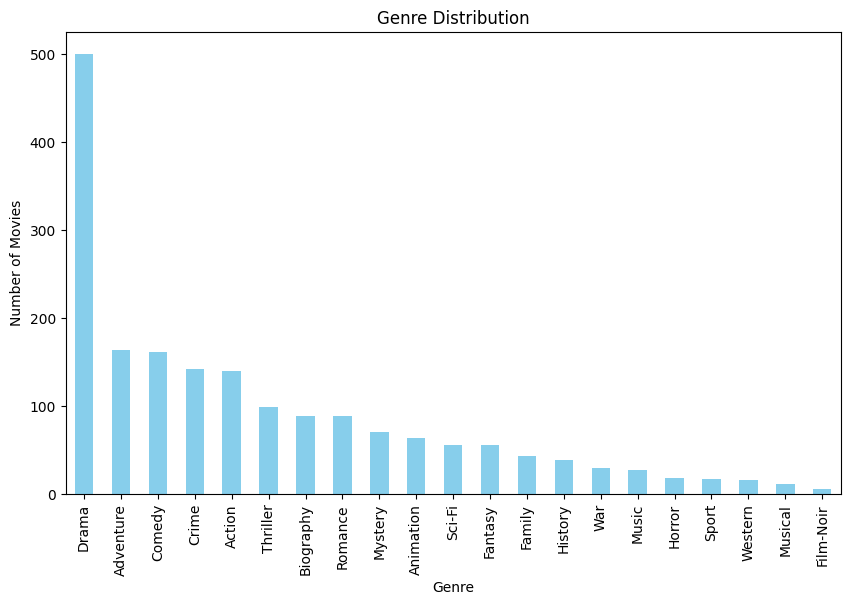

In [16]:
# Plot the genre distribution
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

In [17]:
# #remove unnecessary columns
# columns_to_remove = ['Poster_Link', 'Star1', 'Star2', 'Star3', 'Star4', 'Overview']
# df = df.drop(columns=columns_to_remove, errors='ignore')

In [18]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Series_Title,714,714,The Shawshank Redemption,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Released_Year,714,83,2014,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Certificate,714,12,U,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Runtime,714,118,130 min,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,714,172,[Drama],58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMDB_Rating,714.0,NaN,NaN,NaN,7.937115,0.293278,7.6,7.7,7.9,8.1,9.3
Meta_score,714.0,NaN,NaN,NaN,77.158263,12.401144,28.0,70.0,78.0,86.0,100.0
Director,714,402,Steven Spielberg,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star1,714,472,Tom Hanks,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star2,714,599,Emma Watson,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# seperating numerical and categorical columns

cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("categorical Variables")
print(cat_cols)
print("numerical Variables")
print(num_cols)

categorical Variables
Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Gross'],
      dtype='object')
numerical Variables
['IMDB_Rating', 'Meta_score', 'No_of_Votes']


## EDA Univariate Analysis

IMDB_Rating
Skew: 1.19


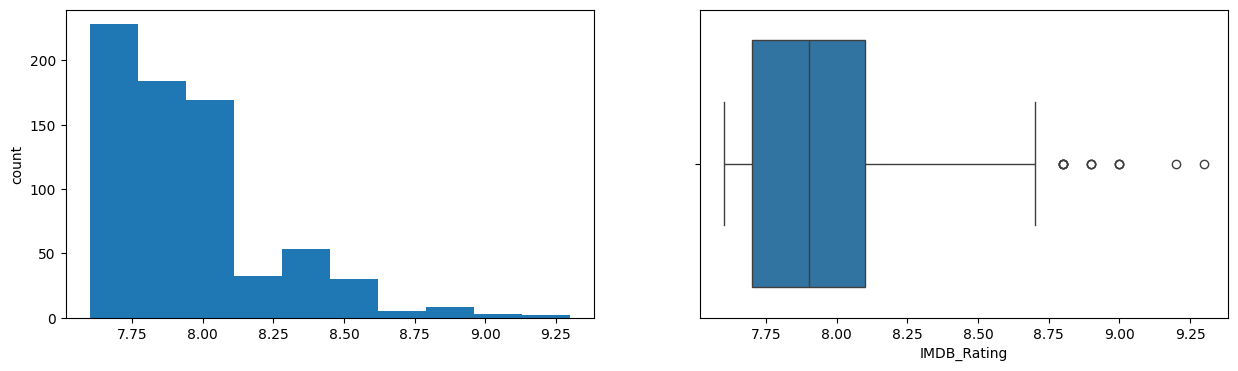

Meta_score
Skew: -0.59


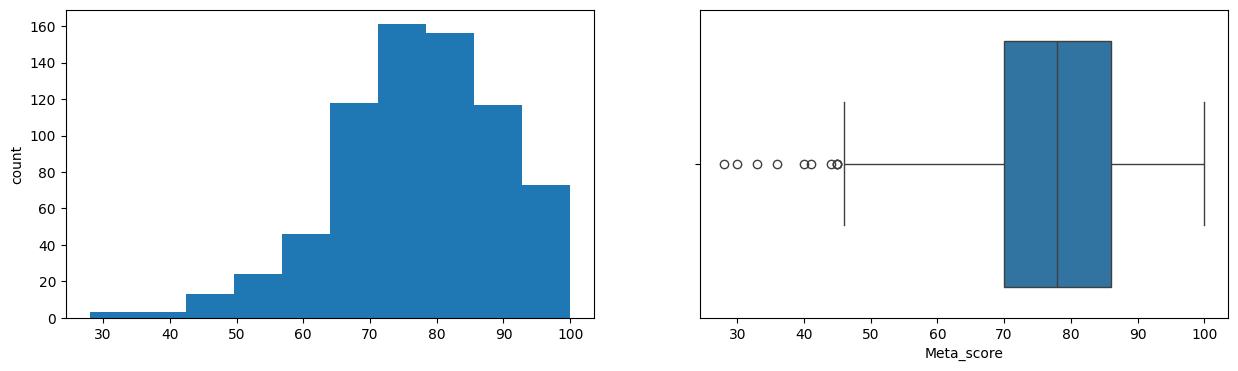

No_of_Votes
Skew: 1.93


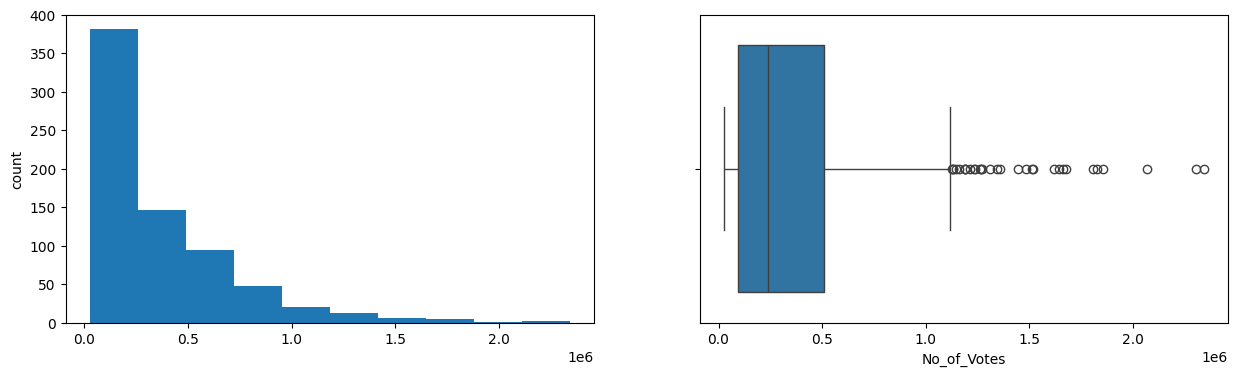

In [20]:
for col in num_cols:
    print(col)
    print('Skew:', round(df[col].skew(),2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [21]:
# Visualization of Categorical variables


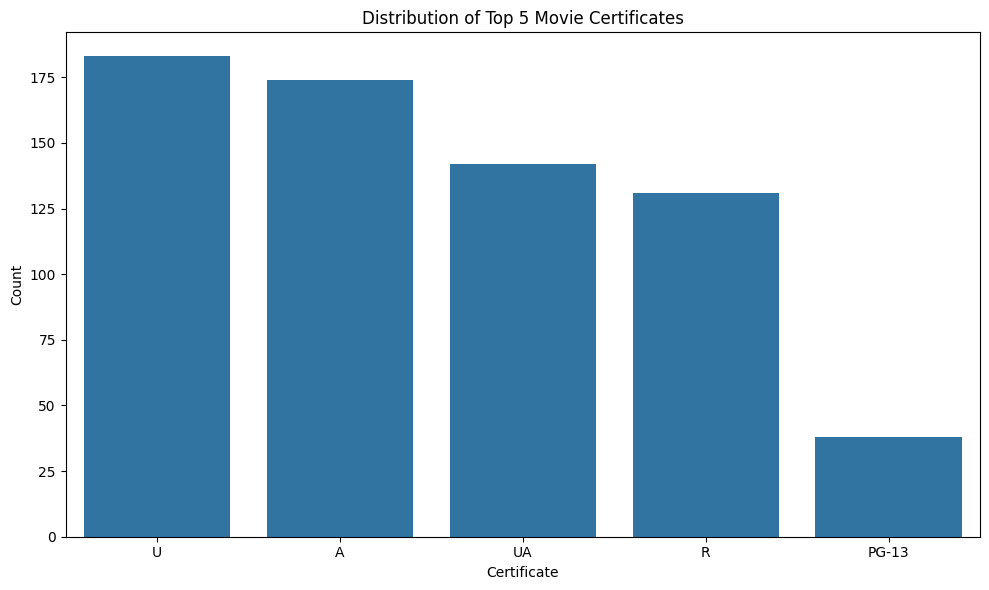

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 certificates
top_5_certificates = df['Certificate'].value_counts().head().index

# Filter the DataFrame to only include rows with the top 5 certificates
df_top_5 = df[df['Certificate'].isin(top_5_certificates)]

plt.figure(figsize=(10, 6))
plt.title('Distribution of Top 5 Movie Certificates')
sns.countplot(x='Certificate', data=df_top_5, order=top_5_certificates)
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [23]:
#Who are the top 5 highest rated directors and what are their ratings ?

ss= df.groupby('Director')[['IMDB_Rating']].mean().sort_values(['IMDB_Rating'],ascending=False).head() 
ss

,IMDB_Rating
Director,
Frank Darabont,8.95
Lana Wachowski,8.70
Irvin Kershner,8.70
George Lucas,8.60
Roberto Benigni,8.60


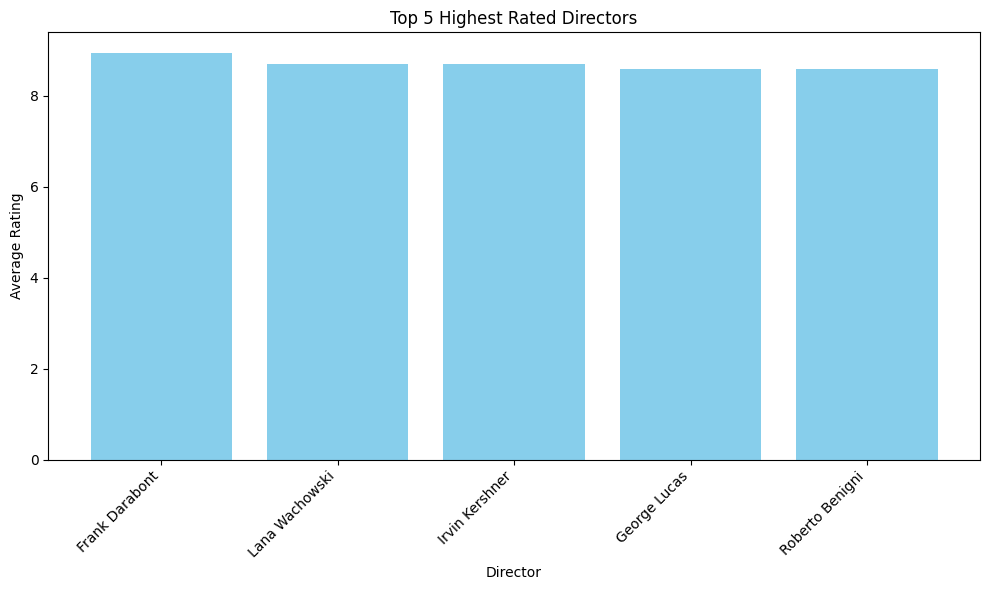

In [24]:
import matplotlib.pyplot as plt

# Assuming 'ss' contains the data with the top 5 highest-rated directors and their ratings
ss = df.groupby('Director')[['IMDB_Rating']].mean().sort_values(['IMDB_Rating'], ascending=False).head()

# Extracting director names and ratings
directors = ss.index
ratings = ss['IMDB_Rating']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(directors, ratings, color='skyblue')

# Adding title and labels
plt.title('Top 5 Highest Rated Directors')
plt.xlabel('Director')
plt.ylabel('Average Rating')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the graph
plt.tight_layout()
plt.show()



In [25]:
# Top 5 movies with highest IMDB Rating
Ascending=df.sort_values(by='IMDB_Rating',ascending=False)
print("Top 5 movies with highest IMDB Rating")
cols = ['Series_Title','IMDB_Rating']
Ascending.loc[0:4,cols]

Top 5 movies with highest IMDB Rating


,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather: Part II,9.0
4,12 Angry Men,9.0


In [26]:
# 5 Movies with Lowest IMDB Rating¶
print("The Last 5 movies with lowest IMDB Rating")
cols = [0,1,4,5]
Ascending.iloc[709:714,cols]

The Last 5 movies with lowest IMDB Rating


,Series_Title,Released_Year,Genre,IMDB_Rating
914,Sherlock Holmes,2009,"[Action, Adventure, Mystery]",7.6
912,Zombieland,2009,"[Adventure, Comedy, Fantasy]",7.6
911,La piel que habito,2011,"[Drama, Horror, Thriller]",7.6
910,Moneyball,2011,"[Biography, Drama, Sport]",7.6
997,From Here to Eternity,1953,"[Drama, Romance, War]",7.6


In [ ]:
## Bivariant Analysis

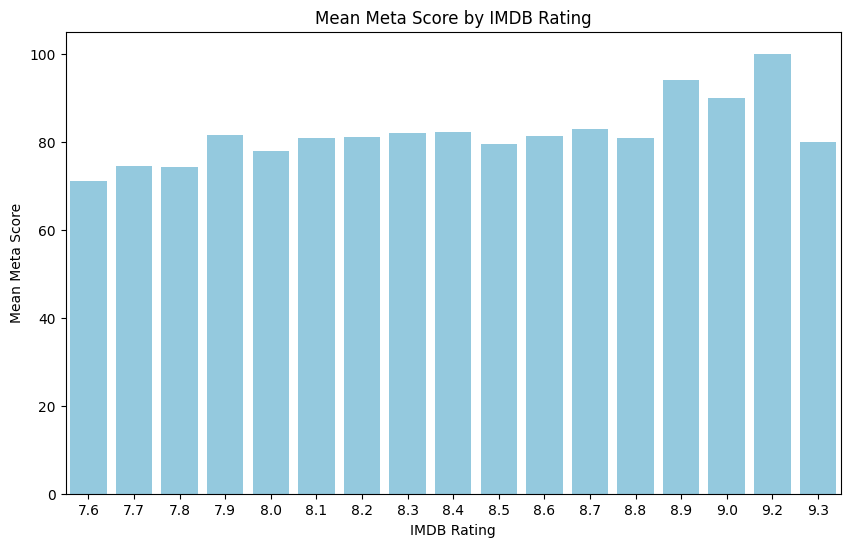

In [50]:
# Scatter plot between IMDB_Rating and Meta_score
# Aggregate data by IMDB_Rating and calculate mean Meta_score for each rating
mean_meta_by_rating = df.groupby('IMDB_Rating')['Meta_score'].mean().reset_index()

# Bar plot for IMDB Rating vs Mean Meta Score
plt.figure(figsize=(10, 6))
sns.barplot(x='IMDB_Rating', y='Meta_score', data=mean_meta_by_rating, color='skyblue')
plt.title('Mean Meta Score by IMDB Rating')
plt.xlabel('IMDB Rating')
plt.ylabel('Mean Meta Score')
plt.show()


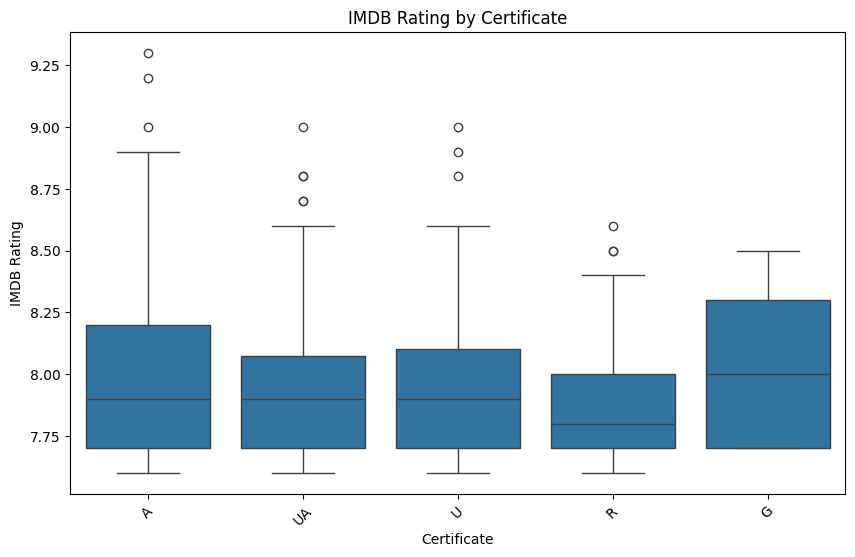

In [42]:


# Assuming df contains the DataFrame with certificate categories

# Filter the DataFrame for the specified certificate categories
selected_certificates = ['A', 'UA', 'U', 'R', 'G']
df_selected_certificates = df[df['Certificate'].isin(selected_certificates)]

# Box plot between Certificate and IMDB_Rating for the selected certificate categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Certificate', y='IMDB_Rating', data=df_selected_certificates)
plt.title('IMDB Rating by Certificate')
plt.xlabel('Certificate')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=45)
plt.show()


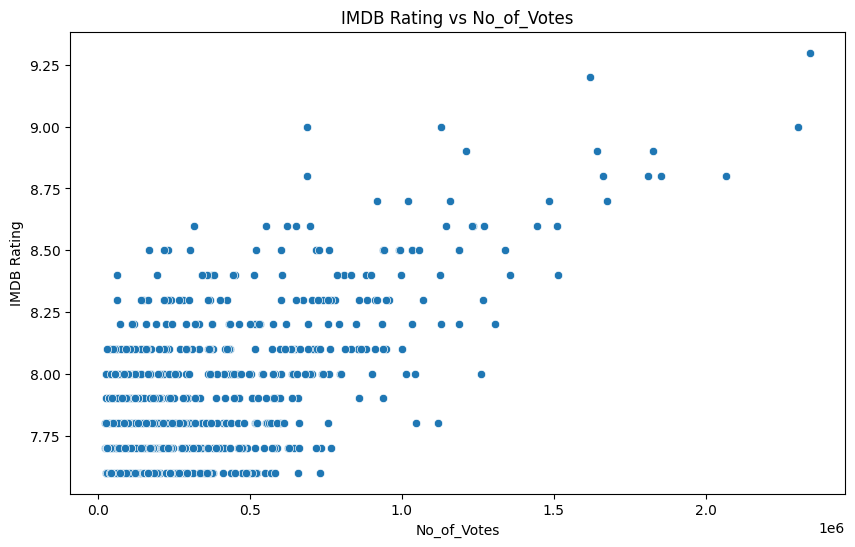

In [40]:
# Scatter plot between No_of_Votes and IMDB_Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='No_of_Votes', y='IMDB_Rating', data=df)
plt.title('IMDB Rating vs No_of_Votes')
plt.xlabel('No_of_Votes')
plt.ylabel('IMDB Rating')
plt.show()




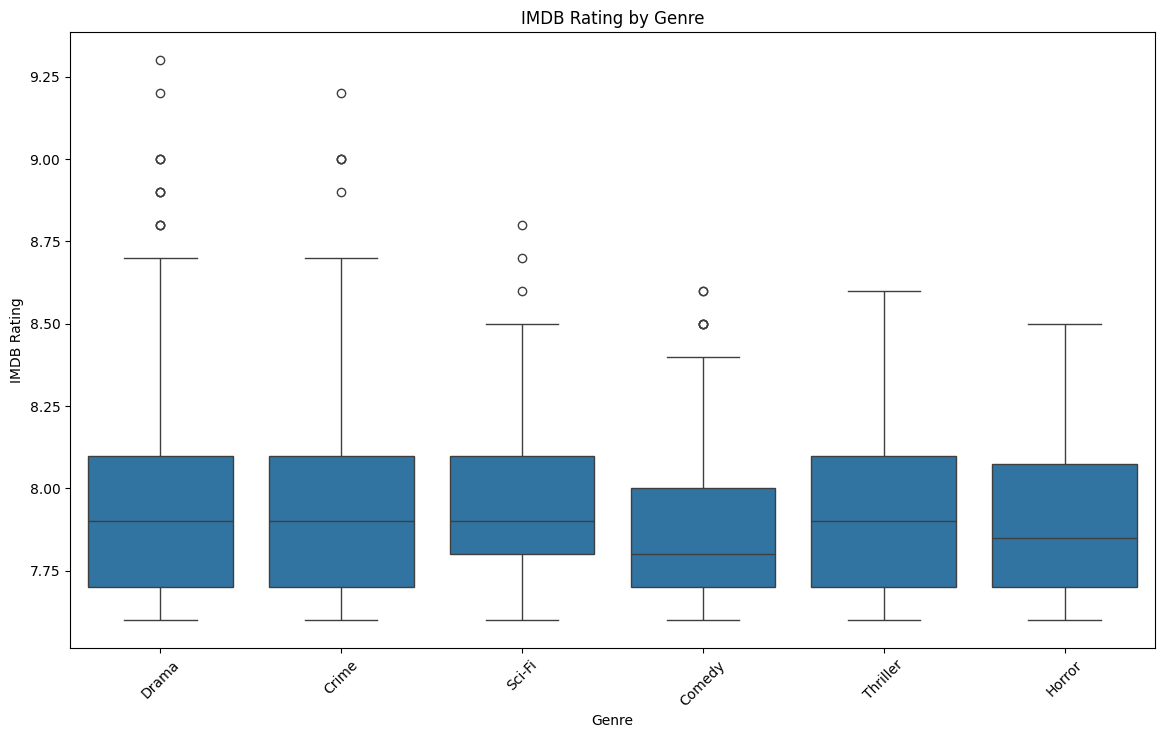

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_exploded contains the exploded DataFrame with each genre on a separate row

# Filter the DataFrame for the specified genres
selected_genres = ['Drama', 'Comedy', 'Sci-Fi', 'Horror', 'Crime', 'Thriller']
df_selected_genres = df_exploded[df_exploded['Genre'].isin(selected_genres)]

# Box plot between Genre and IMDB_Rating for the selected genres
plt.figure(figsize=(14, 8))
sns.boxplot(x='Genre', y='IMDB_Rating', data=df_selected_genres)
plt.title('IMDB Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=45)
plt.show()
